<a href="https://colab.research.google.com/github/guptaprateek98/capstone_bike_sharing/blob/main/(Team)_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

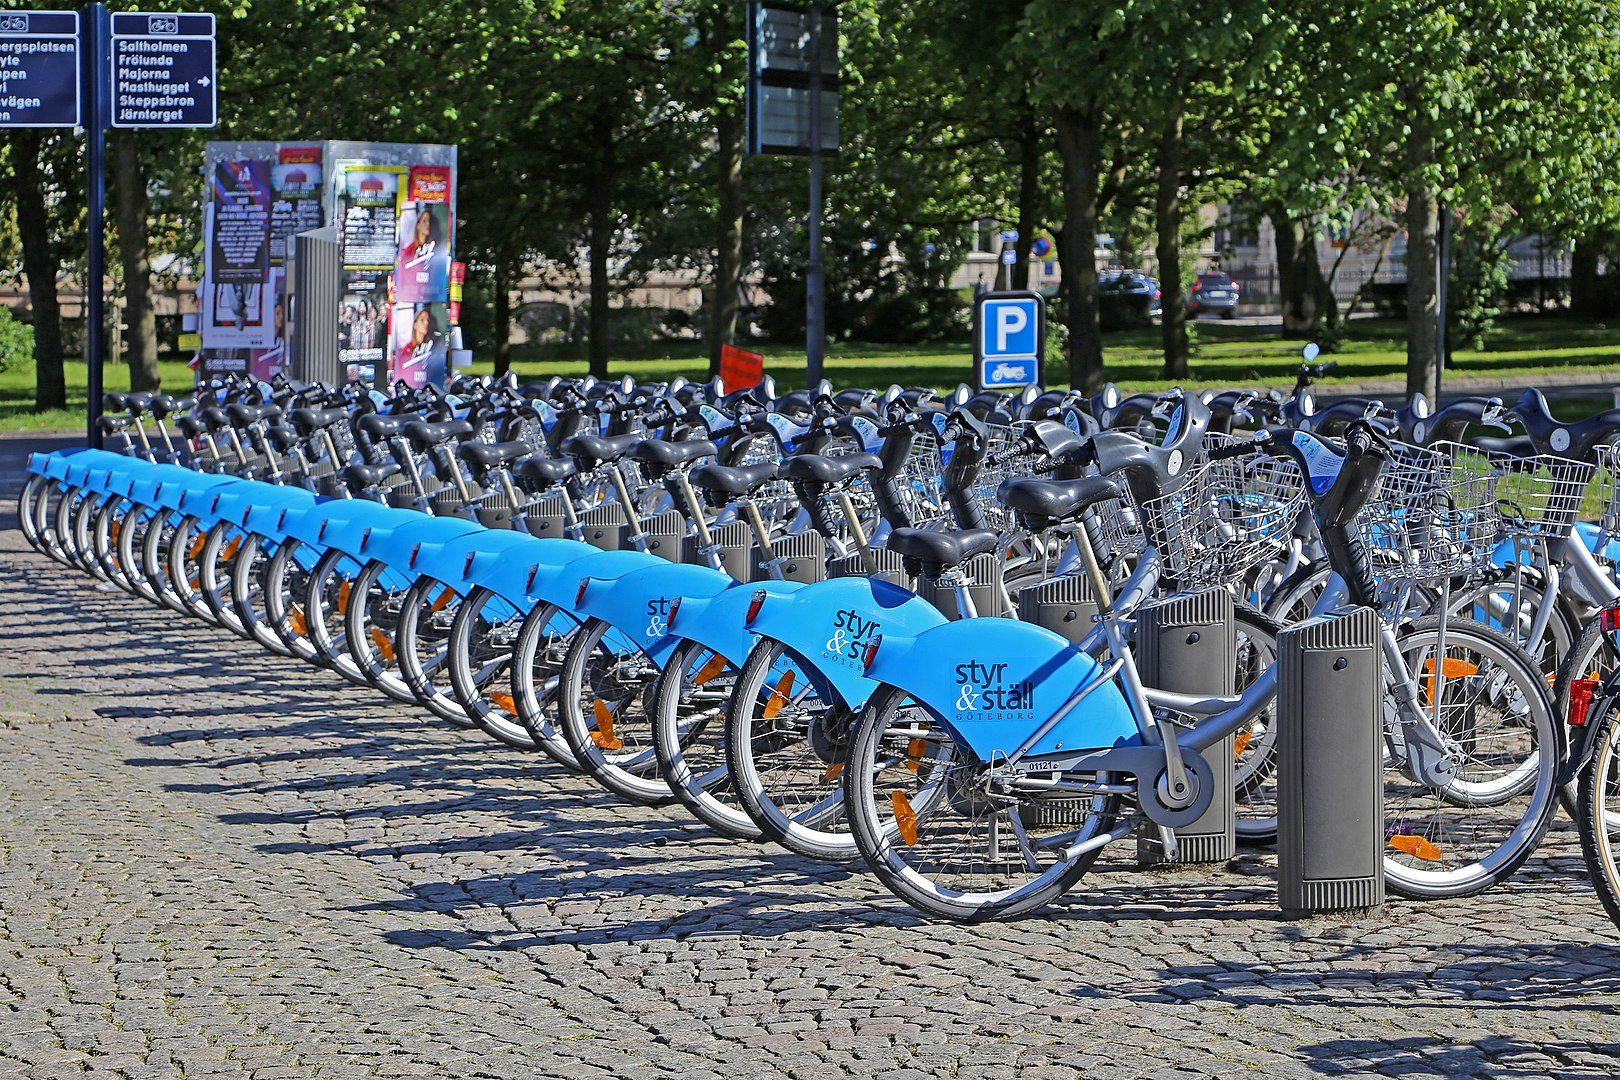

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
# importing libraries
import pandas as pd               #importing pandas
import numpy as np                #importing numpy
from numpy import math
import seaborn as sns             #importing seaborn
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
# plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = (10,6)
import math
from sklearn import neighbors

from sklearn import model_selection
from sklearn.model_selection import KFold

from xgboost import XGBRegressor                       # xgboost model
from sklearn.ensemble import RandomForestRegressor     # random forest model
from sklearn.svm import SVR                            # support vector regressor
from sklearn.linear_model import (Lasso, Ridge,        # regularization
ElasticNet, LassoCV, RidgeCV, ElasticNetCV)
from sklearn.model_selection import GridSearchCV       # grid search to optimize parameters

In [ ]:
# mounting google drive
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading dataset
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Bike Sharing Demand Prediction - Nitesh Verma/SeoulBikeData.csv', encoding = "ISO-8859-1")

##Exploring Data

In [ ]:
# top 5 rows
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
# last 5 rows
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [ ]:
# shape of dataset
df.shape

(8760, 14)

In [ ]:
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

#Data preprocessing

## Steps of data processing
1. Deal with null/missing values
2. Deal with duplicate data
3. Deal with outliers

##1. Deal with null/missing values

In [ ]:
# Checking null/missing values
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
# looking column names, datatype of features, null values, unique values and their number of unique values
df_columns_table=[[name,df[name].dtypes,df[name].isnull().sum(),round(df[name].isnull().sum()/len(df)*100, 2),
                   df[name].nunique(),df[name].unique()] for name in df.columns]
df_columns = pd.DataFrame(df_columns_table, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique'])
df_columns

Column    Dtype  Null  Null (%)  nUnique  \
0                        Date   object     0       0.0      365   
1           Rented Bike Count    int64     0       0.0     2166   
2                        Hour    int64     0       0.0       24   
3             Temperature(°C)  float64     0       0.0      546   
4                 Humidity(%)    int64     0       0.0       90   
5            Wind speed (m/s)  float64     0       0.0       65   
6            Visibility (10m)    int64     0       0.0     1789   
7   Dew point temperature(°C)  float64     0       0.0      556   
8     Solar Radiation (MJ/m2)  float64     0       0.0      345   
9                Rainfall(mm)  float64     0       0.0       61   
10              Snowfall (cm)  float64     0       0.0       51   
11                    Seasons   object     0       0.0        4   
12                    Holiday   object     0       0.0        2   
13            Functioning Day   object     0       0.0        2   

                                               Unique  
0   [01/12/2017, 02/12/2017, 03/12/2017, 04/12/201...  
1   [254, 204, 173, 107, 78, 100, 181, 460, 930, 4...  
2   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
3   [-5.2, -5.5, -6.0, -6.2, -6.4, -6.6, -7.4, -7....  
4   [37, 38, 39, 40, 36, 35, 27, 24, 21, 23, 25, 2...  
5   [2.2, 0.8, 1.0, 0.9, 2.3, 1.5, 1.3, 1.1, 0.5, ...  
6   [2000, 1928, 1996, 1936, 793, 1913, 1687, 1380...  
7   [-17.6, -17.7, -18.6, -18.7, -19.5, -19.3, -19...  
8   [0.0, 0.01, 0.23, 0.65, 0.94, 1.11, 1.16, 1.01...  
9   [0.0, 0.5, 1.0, 2.5, 0.1, 0.2, 0.3, 0.7, 1.6, ...  
10  [0.0, 0.1, 0.3, 0.4, 0.2, 1.0, 0.9, 0.8, 0.7, ...  
11                   [Winter, Spring, Summer, Autumn]  
12                              [No Holiday, Holiday]  
13                                          [Yes, No]

* No null or missing values in dataset

##2. Deal with duplicate data

In [ ]:
# we are going to find out, how many duplicate rows are their.
df[df.duplicated()].shape

(0, 14)

* No duplicate data is present in dataset

##3. Deal with outliers

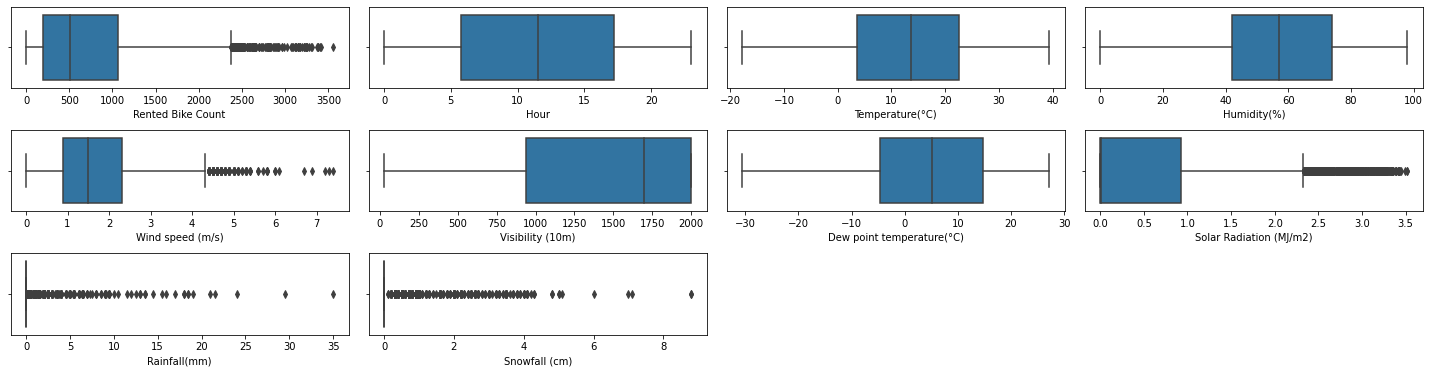

In [ ]:
# looking for outliers of every fearture of dataset with the help of boxplot
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
num_it = 1 

for col in df.describe().columns:
    plt.subplot(6,4,num_it)
    sns.boxplot(df[col])
    num_it+=1
    
plt.tight_layout()

* **Rented Bike count** contains **outliers.**
* Wind Speed, Solar Radiation, Rainfall, and Snowfall contains outlier values which are acceptable.

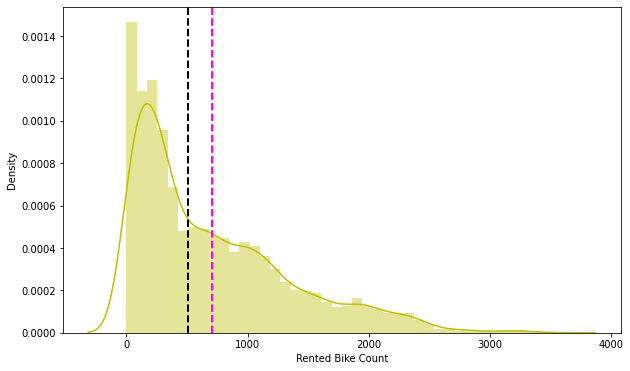

In [ ]:
# Rented bike count (target variable) distribution graph

ax= sns.distplot(df['Rented Bike Count'],hist=True,color='y')
ax.axvline(df['Rented Bike Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['Rented Bike Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

* Rented bike count column follow right tail distribution.



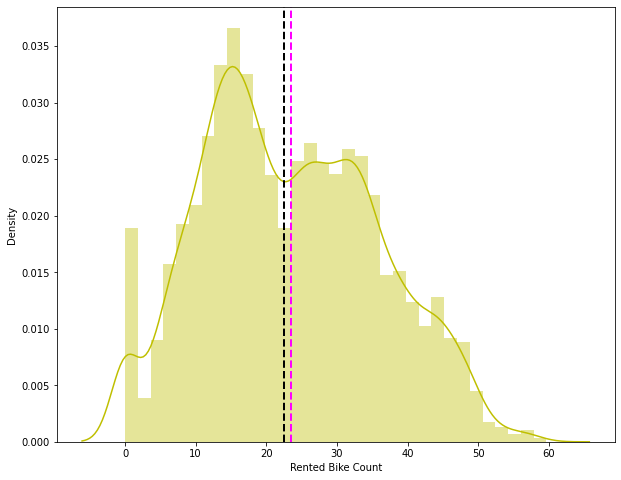

In [ ]:
# square_root transformation

plt.figure(figsize=(10,8))
ax=sns.distplot(np.sqrt(df['Rented Bike Count']), color="y")
ax.axvline(np.sqrt(df['Rented Bike Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['Rented Bike Count']).median(), color='black', linestyle='dashed', linewidth=2)

 * After doing square root of Rented Bike Count, it follows normal distribution.

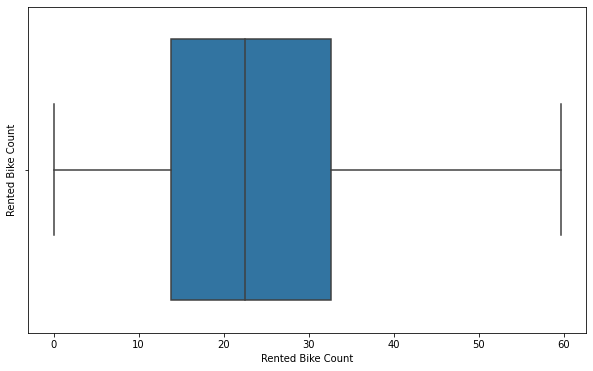

In [ ]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers 
plt.figure(figsize=(10,6))

plt.ylabel('Rented Bike Count')
sns.boxplot(x=np.sqrt(df['Rented Bike Count']))
plt.show()

* **after doing squareroot of Rented Bike Count no outliers detected**

#Feature Engineering

##1. Deal with wrong datatype 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

* Total 14 features present in dataset where **Date column should be datetime dtype.**

In [ ]:
# Date columns to Date format conversion

df['Date']= pd.to_datetime(df['Date'])

##2. Deal with multicollinearity

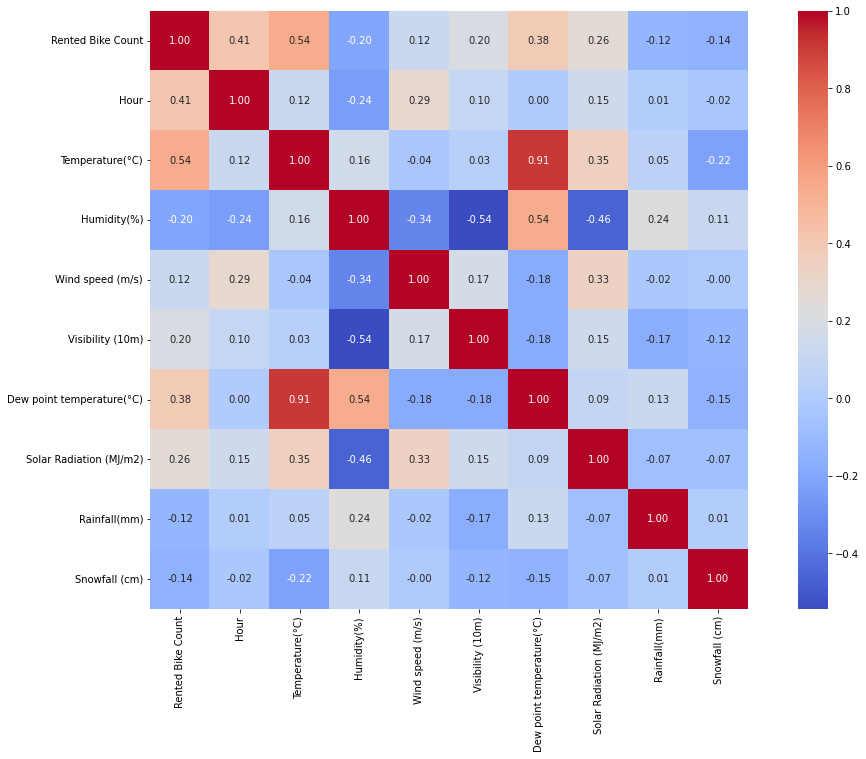

In [ ]:
# ploting heat map finding correlation between columns
hdf = df.corr()

plt.subplots(figsize=(18, 11))
sns.heatmap(hdf,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=1, square=True, cmap='coolwarm');

* Dew point temperature and Temperature are highly correlated



In [ ]:
# droping Dew point temperature(°C) column
df.drop(['Dew point temperature(°C)'], axis = 1, inplace = True)

In [ ]:
# Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  '''
    Function to calculate VIF
  '''
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
  return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count'] ]])

variables       VIF
0                     Hour  3.921832
1          Temperature(°C)  3.228318
2              Humidity(%)  4.868221
3         Wind speed (m/s)  4.608625
4         Visibility (10m)  4.710170
5  Solar Radiation (MJ/m2)  2.246791
6             Rainfall(mm)  1.079158
7            Snowfall (cm)  1.120579

* Values of VIF's are less than 5 which is acceptable, there is less chances of multicollinearity

##3. Extracting day, month, and day of week from Date column.

In [ ]:
# extracting day,month, day of week and weekdays/weekend from date column

df['month'] = df['Date'].apply(lambda x : x.month)
df['day_of_week'] = df['Date'].dt.day_name()
df['weekdays_weekend']=df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','day_of_week'],axis=1)

# EDA (Exploratory Data Analysis)

##1. Univariate analysis

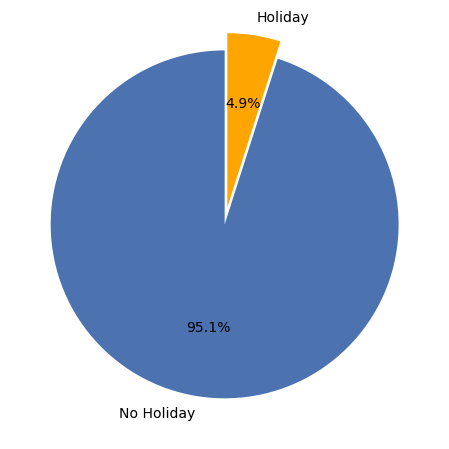

In [ ]:
# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 8,8

# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = df['Holiday'].value_counts().index.tolist()

# Convert value counts to list
sizes = df['Holiday'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other 
explode = (0, 0.1)

# Determine colour of pie chart
colors = ['#4c72b0', 'orange']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()

* According to the pie chart, 95.1% of the data represent working day and only 4.9% of the data represent holiday.

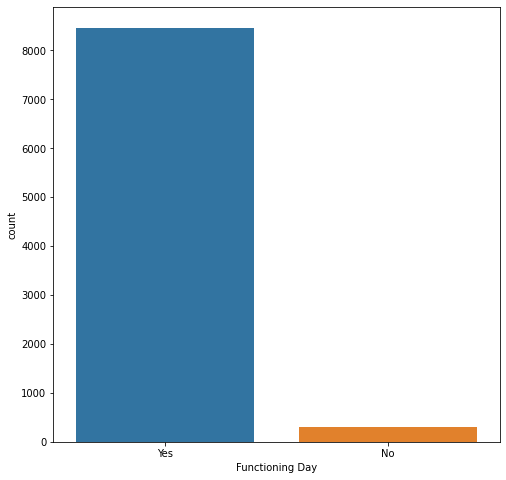

In [ ]:
# Count plot of Functioning day 
sns.countplot(df['Functioning Day']) 

* very less non-functioning day in comparison of functioning day

In [ ]:
#checking counts of functioning day
print(df['Functioning Day'].shape)
print(df['Functioning Day'].value_counts())

(8760,)
Yes    8465
No      295
Name: Functioning Day, dtype: int64


In [ ]:
# Numeric Features

numeric_features= df.select_dtypes(exclude='object')

# Numeric Features info
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   month                    8760 non-null   int64  
 10  weekdays_weekend         8760 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 752.9 KB


In [ ]:
# describing numeric feature

numeric_features.describe().transpose()

count         mean         std   min     25%  \
Rented Bike Count        8760.0   704.602055  644.997468   0.0  191.00   
Hour                     8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)          8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)              8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)         8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)         8760.0  1436.825799  608.298712  27.0  940.00   
Solar Radiation (MJ/m2)  8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)             8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)            8760.0     0.075068    0.436746   0.0    0.00   
month                    8760.0     6.526027    3.448048   1.0    4.00   
weekdays_weekend         8760.0     0.290411    0.453978   0.0    0.00   

                             50%      75%      max  
Rented Bike Count         504.50  1065.25  3556.00  
Hour                       11.50    17.25    23.00  
Temperature(°C)            13.70    22.50    39.40  
Humidity(%)                57.00    74.00    98.00  
Wind speed (m/s)            1.50     2.30     7.40  
Visibility (10m)         1698.00  2000.00  2000.00  
Solar Radiation (MJ/m2)     0.01     0.93     3.52  
Rainfall(mm)                0.00     0.00    35.00  
Snowfall (cm)               0.00     0.00     8.80  
month                       7.00    10.00    12.00  
weekdays_weekend            0.00     1.00     1.00

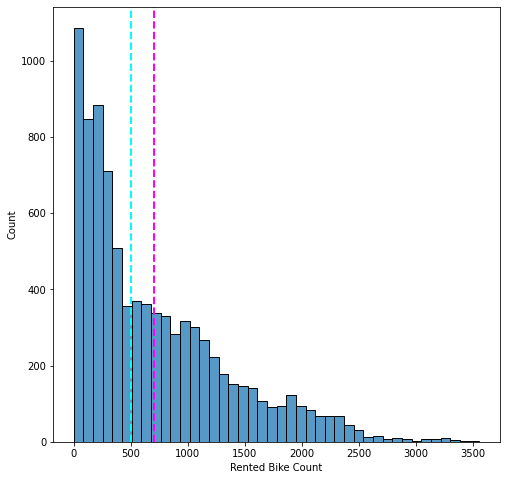

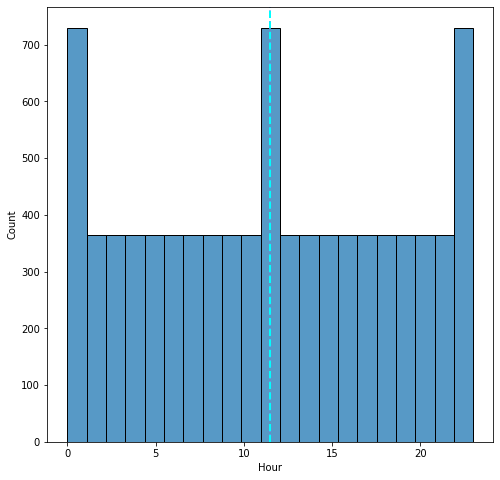

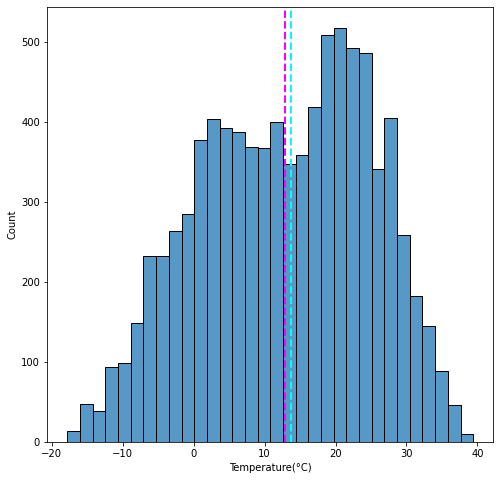

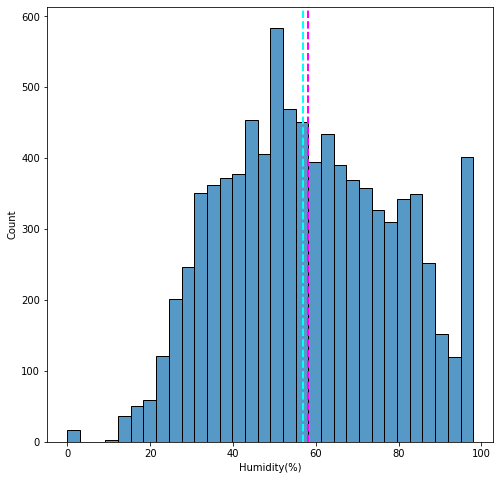

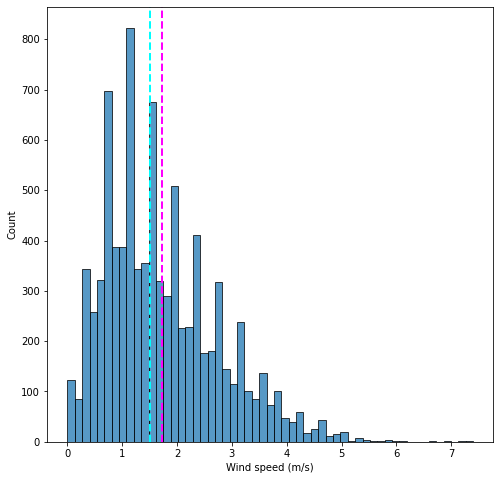

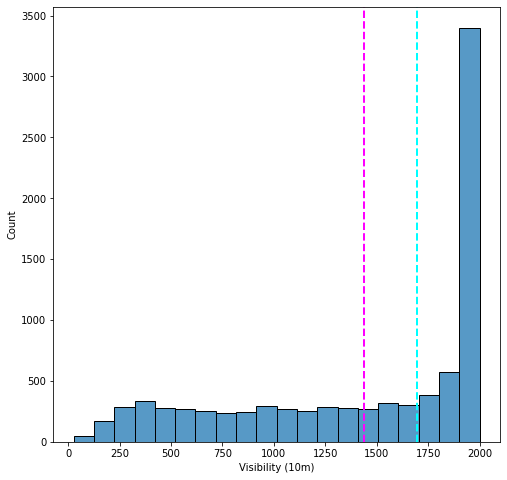

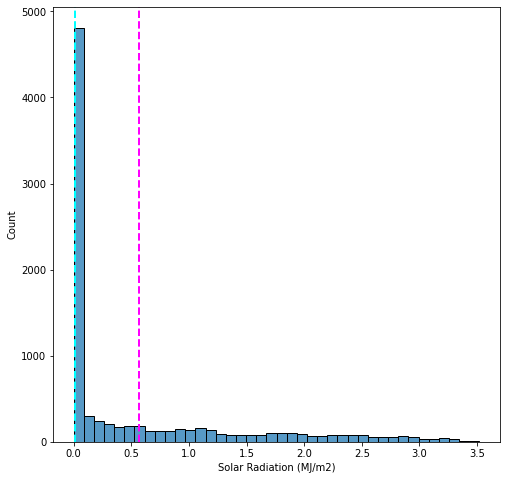

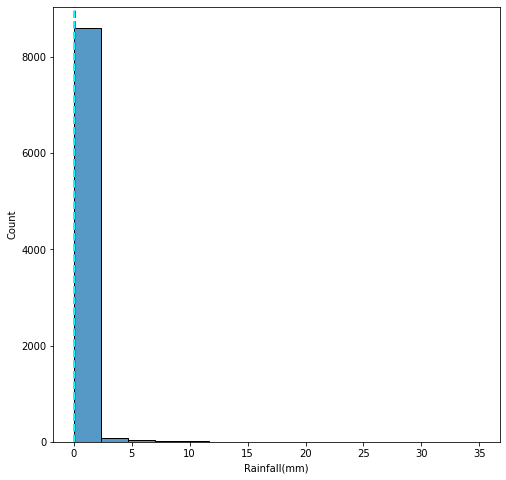

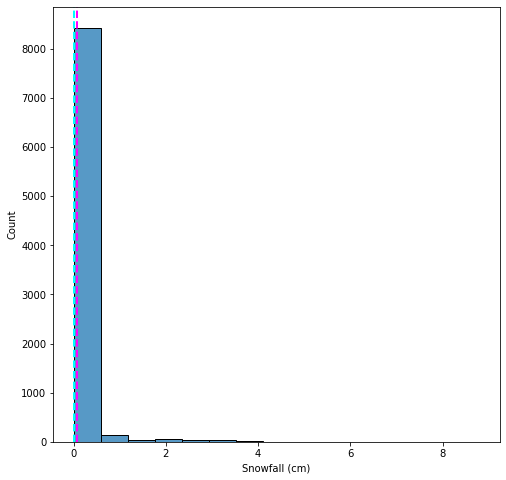

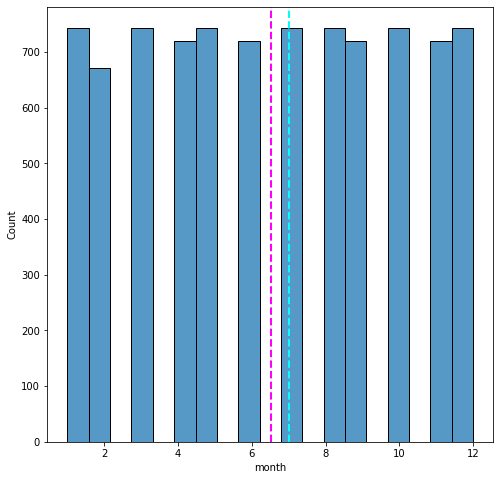

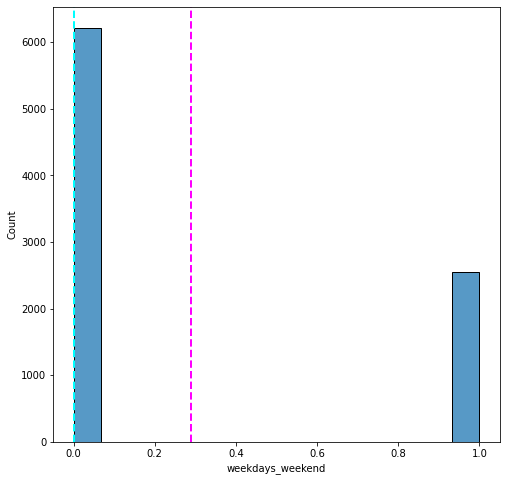

In [ ]:
#plotting histogram

for col in numeric_features[:]:
  sns.histplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)   
  plt.show()

##2. Bivariate Analysis

Text(0.5, 1.0, 'Relation between Temperature and Rental Bike Count')

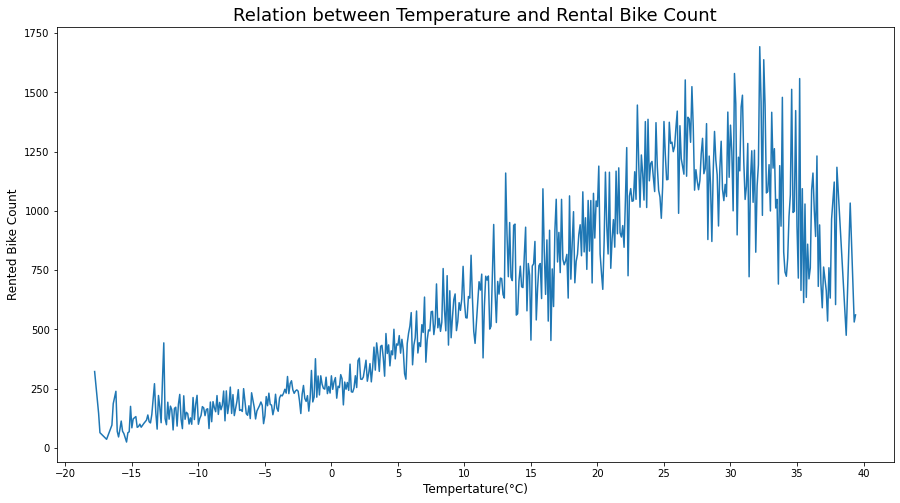

In [ ]:
df_t=df.groupby('Temperature(°C)').agg({'Rented Bike Count':'mean'}).reset_index()
plt.rcParams['figure.figsize'] = 15,8
sns.lineplot(df_t['Temperature(°C)'],df_t['Rented Bike Count'])
plt.xticks(np.arange(-20, 45, 5))
plt.xlabel('Tempertature(°C)',fontsize=12)
plt.ylabel('Rented Bike Count',fontsize=12)
plt.title('Relation between Temperature and Rental Bike Count',fontsize=18)

* According to the line chart, highest demand for the rented bike is seen when there is moderate temperature that is around 25°C to 35°C.

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

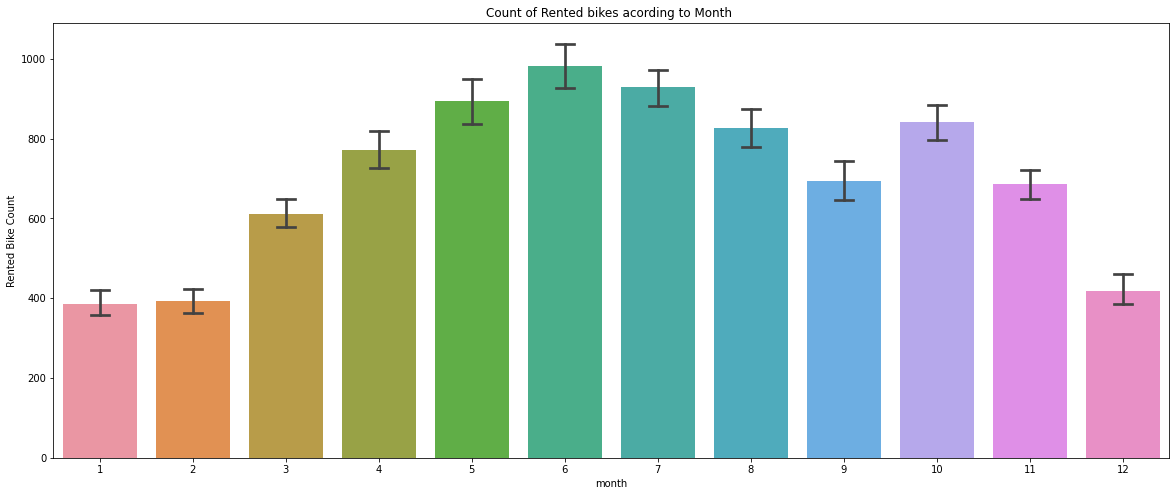

In [ ]:
#MONTH
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df,x='month',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month ')

* From the above bar plot we can clearly say that in month of June, there is high demand for rental bikes. 
* The least demand of rented bikes is seen in the months of January and February.

[Text(0.5, 1.0, 'Count of Rented bikes per Hour of a day')]

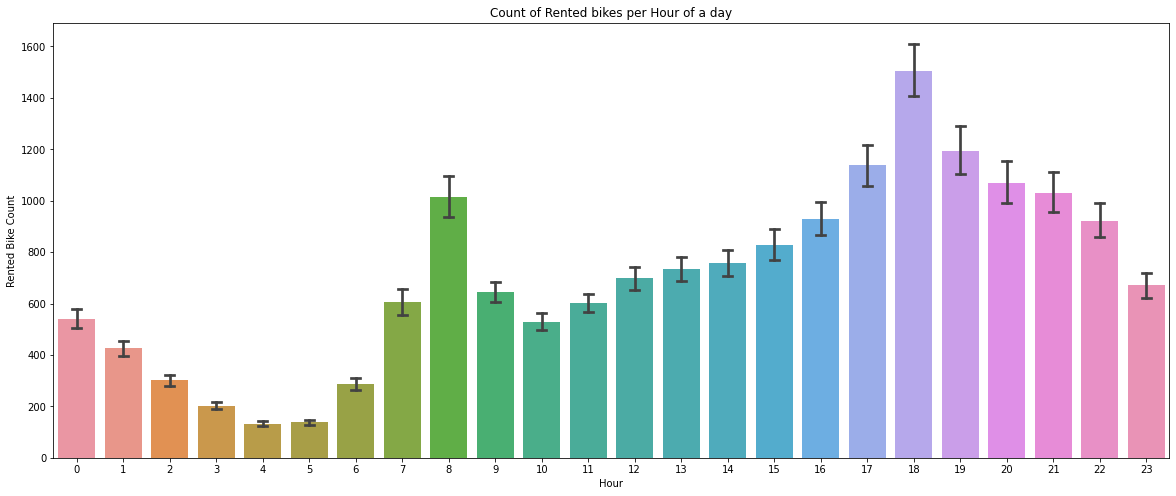

In [ ]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df,x='Hour',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes per Hour of a day')

* In the above plot , it can be seen that generally people use rented bikes during their working hour from 7am to 9am and 5pm to 7pm.

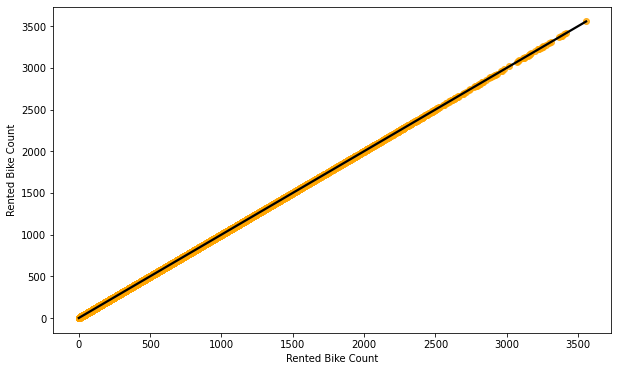

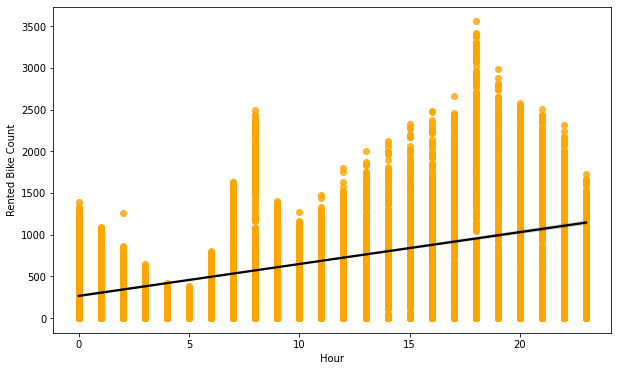

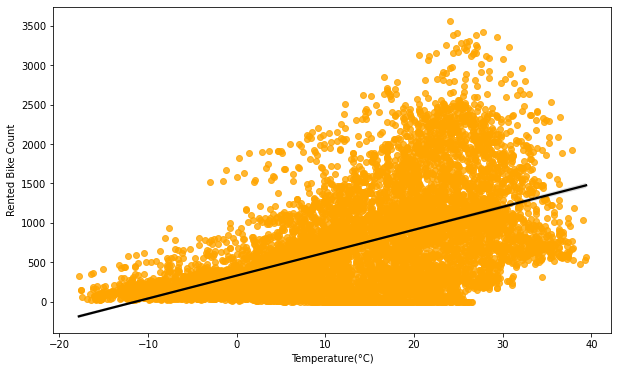

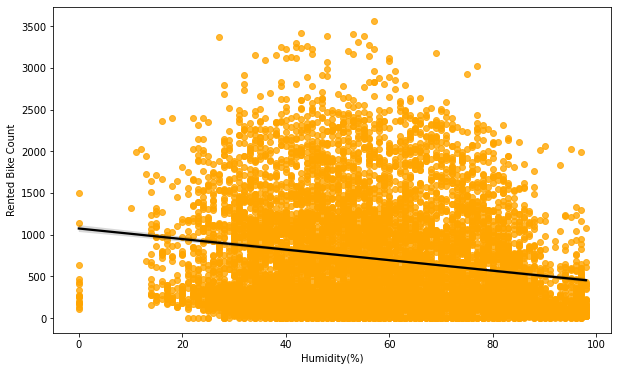

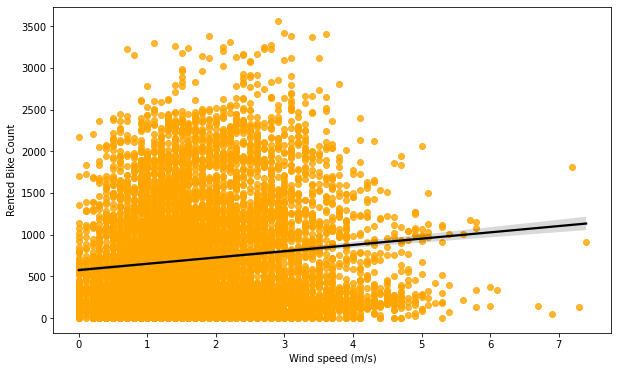

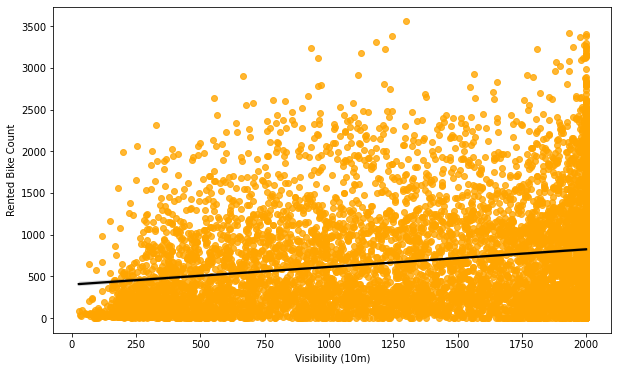

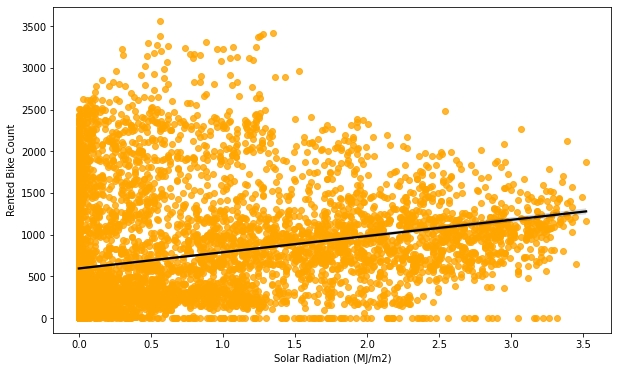

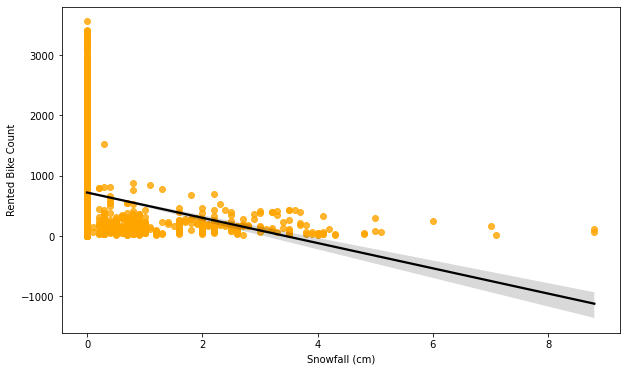

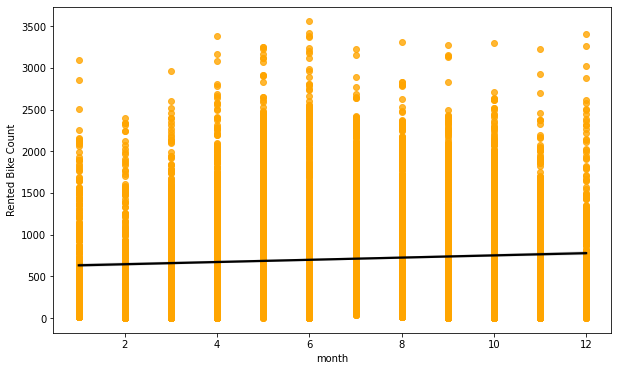

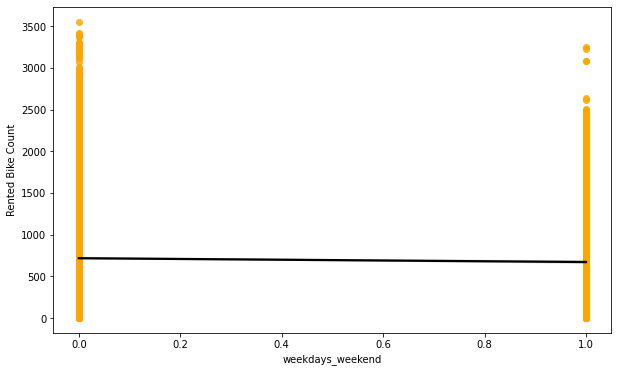

In [ ]:
#printing the regression plot for all the numerical features
for col in numeric_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col],y=df['Rented Bike Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

* According to regression plot and joint plot between Rented Bike Count and Temperature, High temperature leads to high the Rented Bike Count per hour

In [ ]:
#Extracting categorical features
categorical_features= df.select_dtypes(include='object')
categorical_features

Seasons     Holiday Functioning Day
0     Winter  No Holiday             Yes
1     Winter  No Holiday             Yes
2     Winter  No Holiday             Yes
3     Winter  No Holiday             Yes
4     Winter  No Holiday             Yes
...      ...         ...             ...
8755  Autumn  No Holiday             Yes
8756  Autumn  No Holiday             Yes
8757  Autumn  No Holiday             Yes
8758  Autumn  No Holiday             Yes
8759  Autumn  No Holiday             Yes

[8760 rows x 3 columns]

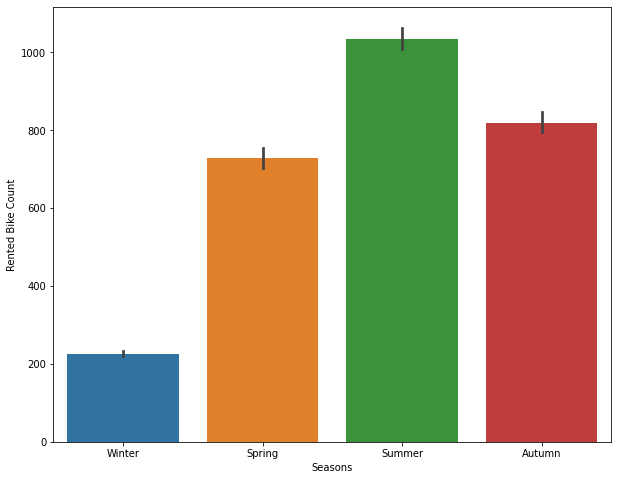

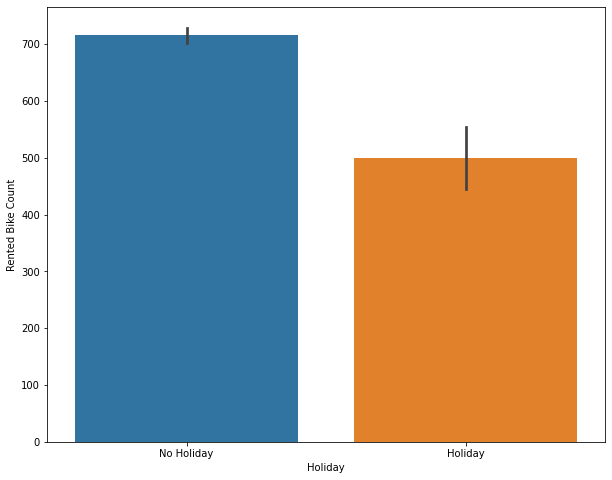

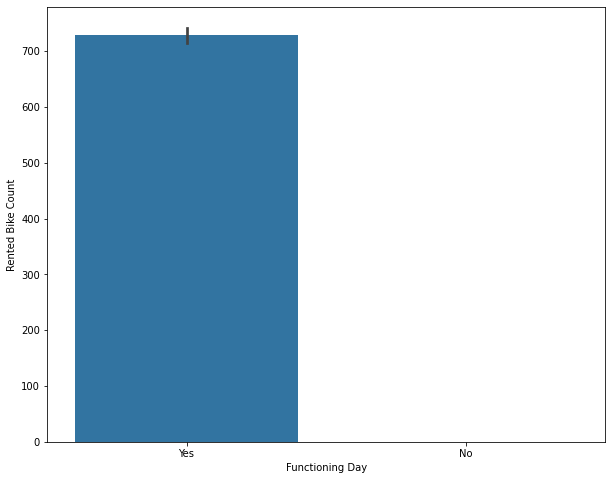

In [ ]:
#ploting Box plot to visualize and trying to get information from plot
for col in categorical_features:
  plt.figure(figsize=(10,8))
  sns.barplot(x=df[col],y=df["Rented Bike Count"])
  plt.show()

* According to bargraph, During winter season demand of rental bike is less in comparision to other seasons.
* On working day, the rental bikes demand is high in comparison to holiday.
* Very high demand of rentel bikes on functioning day, on the otherhand, no demand on non functioning day.

Text(0.5, 1.0, 'Rented bike requirement during different seasons')

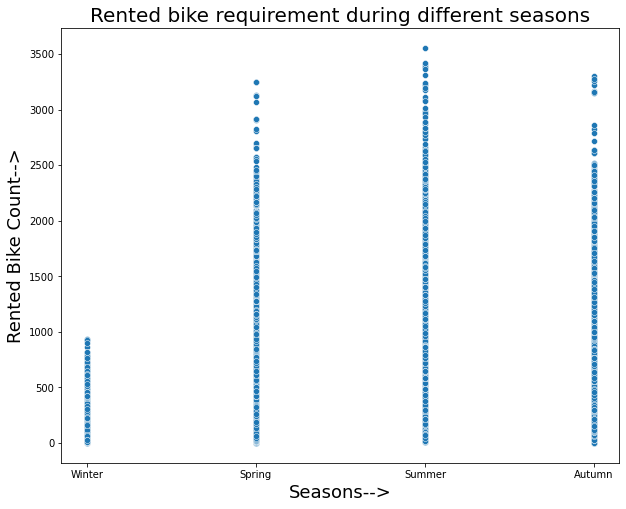

In [ ]:
#ploting cat plot for more info
plt.figure(figsize=(10,8))
sns.scatterplot(x='Seasons',y='Rented Bike Count',data=df)
plt.xlabel('Seasons-->',fontsize=18)
plt.ylabel('Rented Bike Count-->',fontsize=18)
plt.title('Rented bike requirement during different seasons',fontsize=20)

* we can clearly see that there is less demand of rented bike during winter season

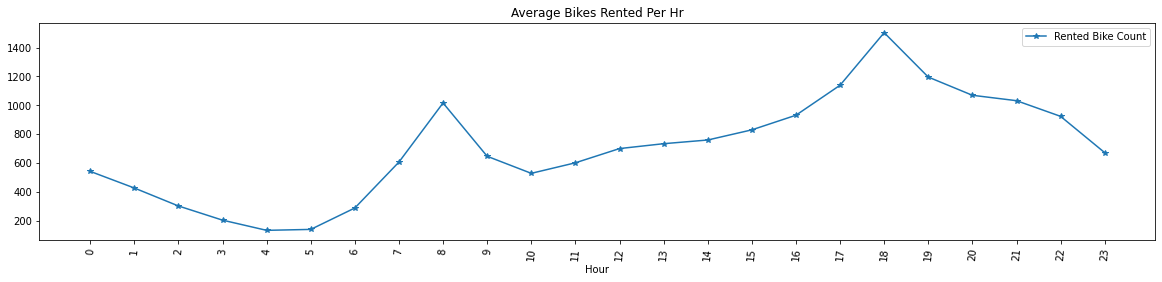

In [ ]:
#ploting line graph
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = df.groupby('Hour')['Rented Bike Count'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(20,4))
a=avg_rent_hrs.plot(legend=True,marker='*',title="Average Bikes Rented Per Hr")
a.set_xticks(range(len(avg_rent_hrs)));
a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85);

##3. Multivariate Analysis

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

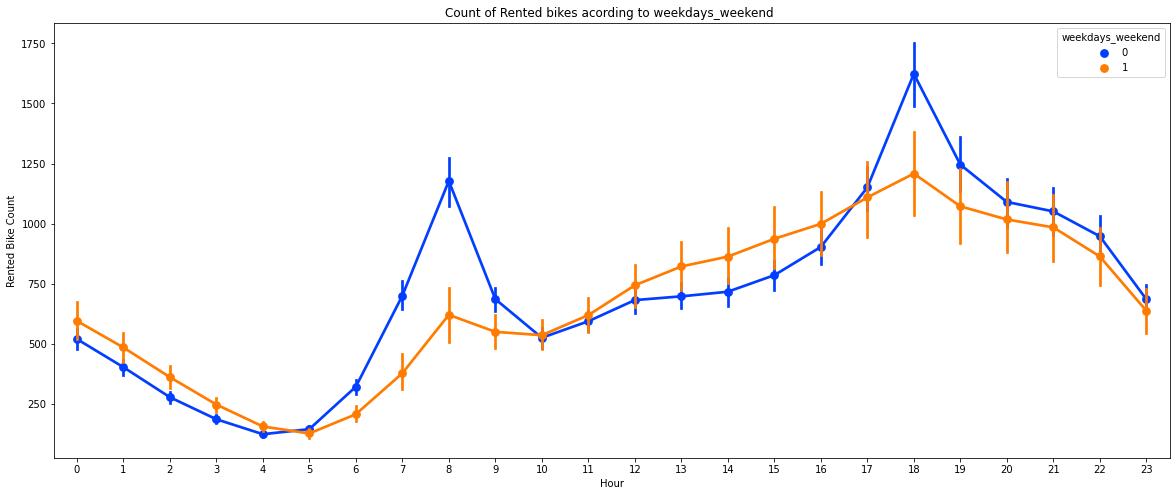

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data= df,x='Hour',y='Rented Bike Count',hue='weekdays_weekend',ax=ax,palette= 'bright')
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

* According to point plot, weekdays (blue line) shows higher demand of rented bikes, in comparison to weekends (orange line). 
* Peak demand for rented bike in weekend and weekdays is during 6pm (18:00).

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

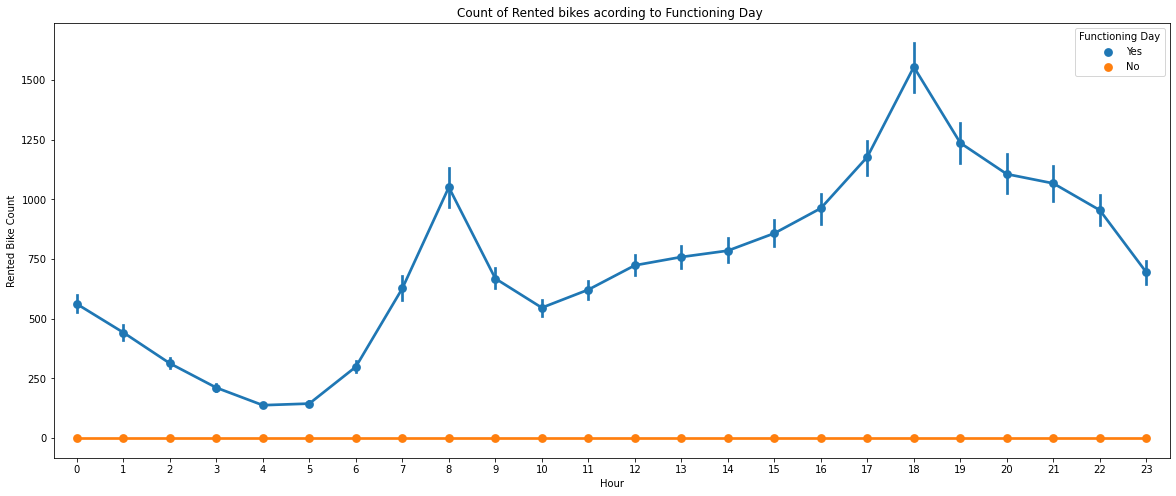

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Functioning Day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

* In the above bar plot and point plot which shows the use of rented bike in functioning daya or not, and it clearly shows that,
Peoples do not use reneted bikes in no functioning day.

[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

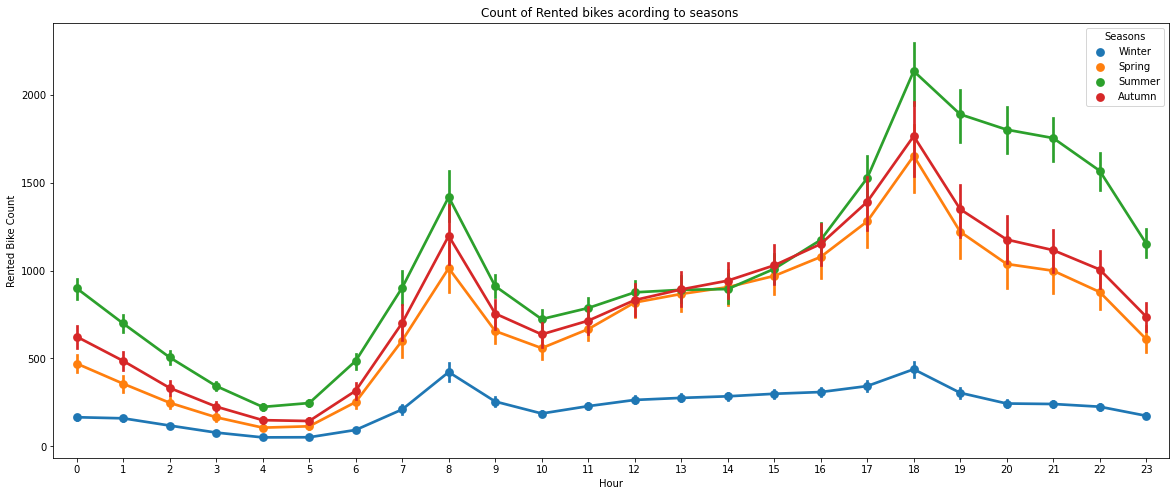

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')

* As per the graphs Summer is the busiest season in regards to rented bike demand. 
* Peak demand for rented bike is during 6pm (18:00). 
* Rented bike demand is less during winter season, in comparison to other seasons.

#Encoding categorical columns

* 3 columns (Seasons, Holiday and Functioning Day) can be encoded.

In [ ]:
#creating Dummy variable for categorical columns
dummy_categorical_feature= pd.get_dummies(categorical_features,drop_first=True)
dummy_categorical_feature

Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
0                  0               0               1                   1   
1                  0               0               1                   1   
2                  0               0               1                   1   
3                  0               0               1                   1   
4                  0               0               1                   1   
...              ...             ...             ...                 ...   
8755               0               0               0                   1   
8756               0               0               0                   1   
8757               0               0               0                   1   
8758               0               0               0                   1   
8759               0               0               0                   1   

      Functioning Day_Yes  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
...                   ...  
8755                    1  
8756                    1  
8757                    1  
8758                    1  
8759                    1  

[8760 rows x 5 columns]

In [ ]:
#concating numeric columns and dummy columns and creating final df
f_df= pd.concat([dummy_categorical_feature,numeric_features],axis=1)

#showing head of final df
f_df.head()

Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
0               0               0               1                   1   
1               0               0               1                   1   
2               0               0               1                   1   
3               0               0               1                   1   
4               0               0               1                   1   

   Functioning Day_Yes  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0                    1                254     0             -5.2           37   
1                    1                204     1             -5.5           38   
2                    1                173     2             -6.0           39   
3                    1                107     3             -6.2           40   
4                    1                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0               2.2              2000                      0.0           0.0   
1               0.8              2000                      0.0           0.0   
2               1.0              2000                      0.0           0.0   
3               0.9              2000                      0.0           0.0   
4               2.3              2000                      0.0           0.0   

   Snowfall (cm)  month  weekdays_weekend  
0            0.0      1                 0  
1            0.0      1                 0  
2            0.0      1                 0  
3            0.0      1                 0  
4            0.0      1                 0

In [ ]:
#describing final DF
f_df.describe().transpose()

count         mean         std   min     25%  \
Seasons_Spring           8760.0     0.252055    0.434217   0.0    0.00   
Seasons_Summer           8760.0     0.252055    0.434217   0.0    0.00   
Seasons_Winter           8760.0     0.246575    0.431042   0.0    0.00   
Holiday_No Holiday       8760.0     0.950685    0.216537   0.0    1.00   
Functioning Day_Yes      8760.0     0.966324    0.180404   0.0    1.00   
Rented Bike Count        8760.0   704.602055  644.997468   0.0  191.00   
Hour                     8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)          8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)              8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)         8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)         8760.0  1436.825799  608.298712  27.0  940.00   
Solar Radiation (MJ/m2)  8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)             8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)            8760.0     0.075068    0.436746   0.0    0.00   
month                    8760.0     6.526027    3.448048   1.0    4.00   
weekdays_weekend         8760.0     0.290411    0.453978   0.0    0.00   

                             50%      75%      max  
Seasons_Spring              0.00     1.00     1.00  
Seasons_Summer              0.00     1.00     1.00  
Seasons_Winter              0.00     0.00     1.00  
Holiday_No Holiday          1.00     1.00     1.00  
Functioning Day_Yes         1.00     1.00     1.00  
Rented Bike Count         504.50  1065.25  3556.00  
Hour                       11.50    17.25    23.00  
Temperature(°C)            13.70    22.50    39.40  
Humidity(%)                57.00    74.00    98.00  
Wind speed (m/s)            1.50     2.30     7.40  
Visibility (10m)         1698.00  2000.00  2000.00  
Solar Radiation (MJ/m2)     0.01     0.93     3.52  
Rainfall(mm)                0.00     0.00    35.00  
Snowfall (cm)               0.00     0.00     8.80  
month                       7.00    10.00    12.00  
weekdays_weekend            0.00     1.00     1.00

# Functions

## Creating Function to train linear models and calculate scores

In [ ]:
#creating list of matrix to store the evaluation matrix of all model
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]

In [ ]:
# making a function to train and evaluate linear model
def train_linear_model (model,X_train,y_train,X_test,y_test):

#training the model
  model.fit(X_train,y_train)

  #predicting the values
  pred = model.predict(X_test)
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  print('\n================Evaluation Matrix=========================\n')

  #finding mean_squared_error
  MSE  = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)
  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  
  print('\n================Evaluation Matrix=========================\n')

  #appending metrice to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)
    
  # ploting the line graph of actual and predicted values
  print('\
  =========================================================\
  Evalution Graph\
  ===================================================\n')  
  plt.figure(figsize=(20,10))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()



## creating function to run different models

In [ ]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    import math
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    print('\n================Evaluation Matrix=========================\n')
    MSE  = mean_squared_error(y_test,preds)
    print("MSE :" , MSE)
    
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)
    r2 = r2_score(y_test,preds)
    print("R2 :" ,r2)
    adj_r2=1-(1-r2_score(y_test,preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2)

    train_class_preds = linear_model.predict(X_train)

    print('\n================Evaluation Matrix=========================\n')

    mean_sq_error.append(MSE)
    root_mean_sq_error.append(RMSE)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)

    #ploting 
    print('\
    =========================================================\
    Evaluation Graph\
    ===================================================\n') 
    plt.figure(figsize=(20,10))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])    
    plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
    plt.show()

## creating function to get feature importance

In [ ]:
def get_features_importance (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='#ADD8E6', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

#Models

## Train Test Split for Linear Regression

In [ ]:
# Train - Spliting  data
X=f_df.drop(['Rented Bike Count'],axis=1)

In [ ]:
y=np.sqrt(f_df['Rented Bike Count'])

In [ ]:
#spliting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
#scaling data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

## 1. Linear Regresseion

In [ ]:
from sklearn.linear_model import LinearRegression
#linear regression model

linear_model= LinearRegression()


================Evaluation Matrix=========================

MSE : 173680.50589810018
RMSE : 416.74993209129644
R2 : 0.577556643905986
Adjusted R2 :  0.5746419013386401

================Evaluation Matrix=========================

  =========================================================  Evalution Graph  ===================================================



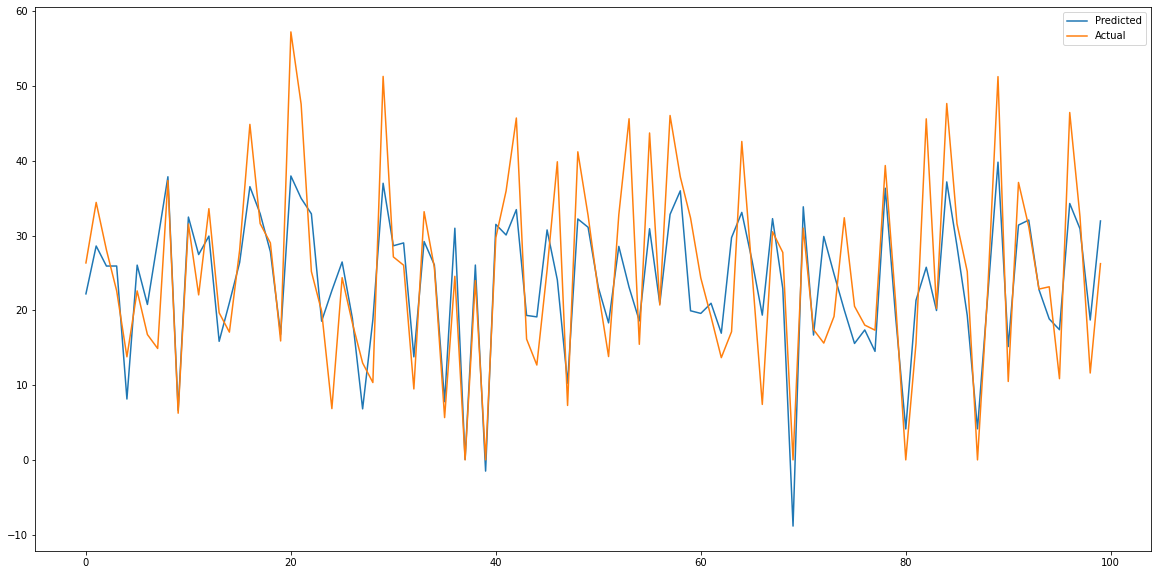

In [ ]:
train_linear_model(linear_model, X_train, y_train, X_test, y_test)

## 2. Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

# Cross validation and Hyperparameter tuning
# finding the best parameters for lasso by gridsearchcv
from sklearn.model_selection import GridSearchCV
lasso_model = Lasso()
#setting the parameters of the lasso model
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_grid = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)


================Evaluation Matrix=========================

MSE : 174034.67172641933
RMSE : 417.1746297732154
R2 : 0.5766952058283198
Adjusted R2 :  0.5737745195759854

================Evaluation Matrix=========================

  =========================================================  Evalution Graph  ===================================================



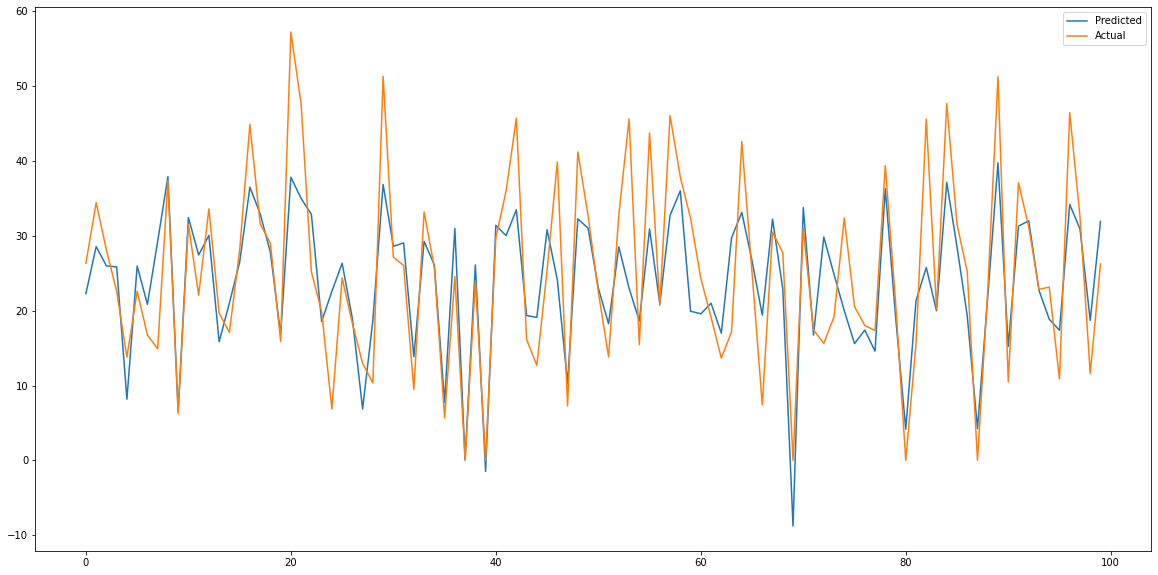

In [ ]:
# calling train_linear_model to train,fit and evalution of lasso model
train_linear_model(lasso_grid,X_train,y_train,X_test,y_test)

##3. Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()

# Cross validation and Hyperparameter tuning
# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)


================Evaluation Matrix=========================

MSE : 173959.54612762743
RMSE : 417.0845791055184
R2 : 0.5768779339354158
Adjusted R2 :  0.5739585084565892

================Evaluation Matrix=========================

  =========================================================  Evalution Graph  ===================================================



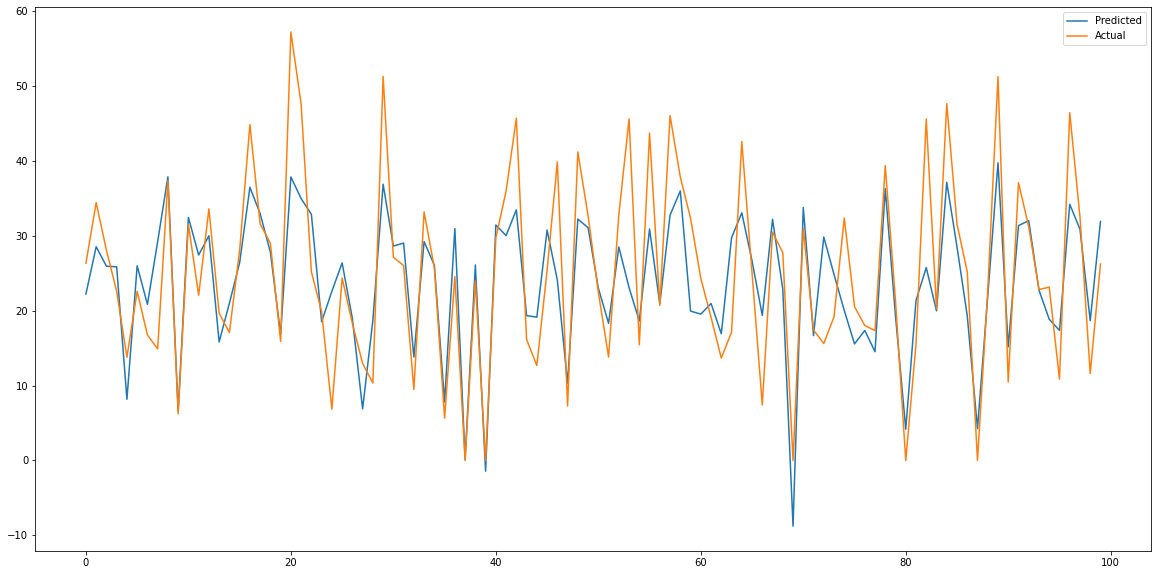

In [ ]:
# calling train_linear_model to train,fit and evalution of ridge model

train_linear_model(ridge_grid,X_train,y_train,X_test,y_test)

##4. ElasticNet Regression

In [ ]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()

# Cross validation and Hyperparameter tuning
# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elastic_grid = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)


================Evaluation Matrix=========================

MSE : 174324.67842313595
RMSE : 417.5220693845248
R2 : 0.575989822103087
Adjusted R2 :  0.5730642688977265

================Evaluation Matrix=========================

  =========================================================  Evalution Graph  ===================================================



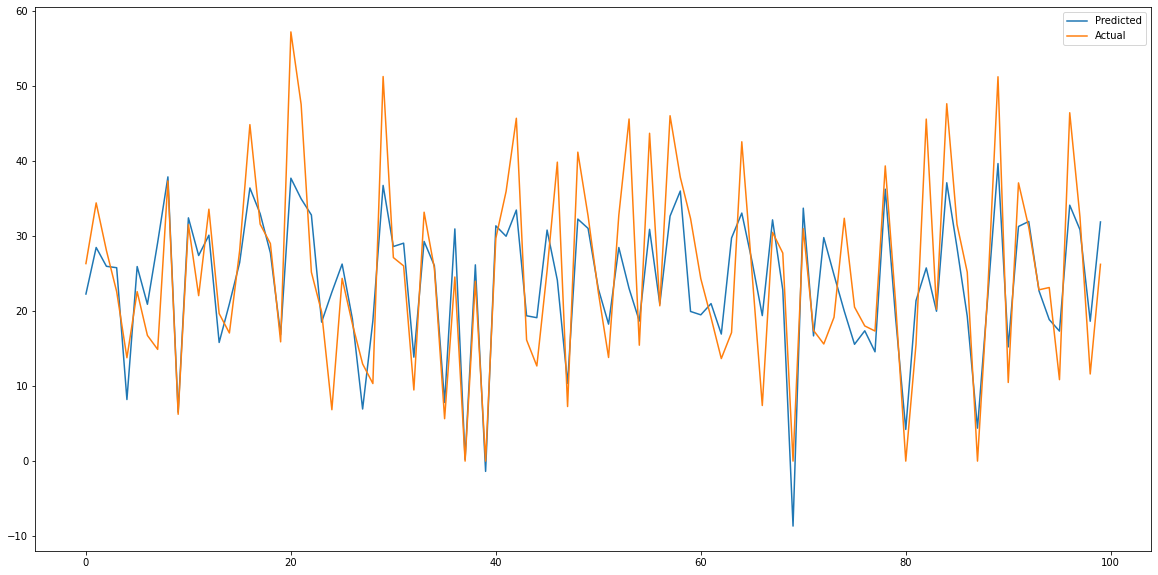

In [ ]:
# calling train_linear_model to train,fit and evalution of elasticnet model
train_linear_model(elastic_grid,X_train,y_train,X_test,y_test)

##5. Polynomial Regression

In [ ]:
#creating pipeline to convert x to polynomial feature and apply Linear Regression

from sklearn.pipeline import make_pipeline
#importing polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pipe=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())


================Evaluation Matrix=========================

MSE : 115078.89375005894
RMSE : 339.23280170121956
R2 : 0.7200934333995792
Adjusted R2 :  0.7181621553411586

================Evaluation Matrix=========================

  =========================================================  Evalution Graph  ===================================================



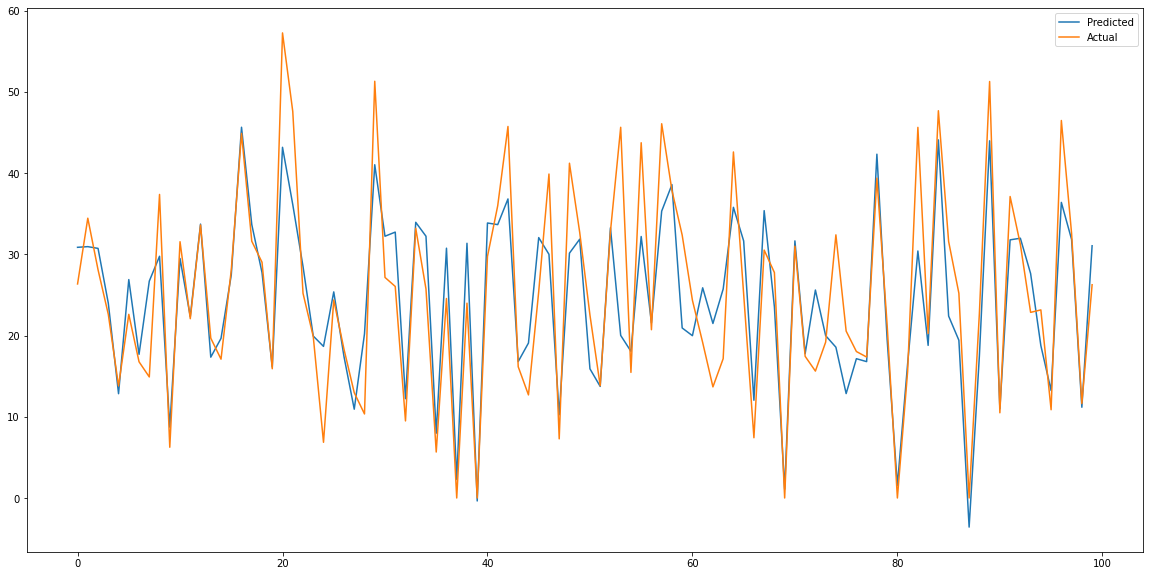

In [ ]:
# calling train_linear_model to train,fit and evalution of polynomial model
train_linear_model(pipe,X_train,y_train,X_test,y_test)

##6. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor


================Evaluation Matrix=========================

MSE : 24.121448856273755
RMSE : 4.911359165880027
R2 : 0.8425319271436
Adjusted R2 :  0.8414454409003406

================Evaluation Matrix=========================

    =========================================================    Evaluation Graph    ===================================================



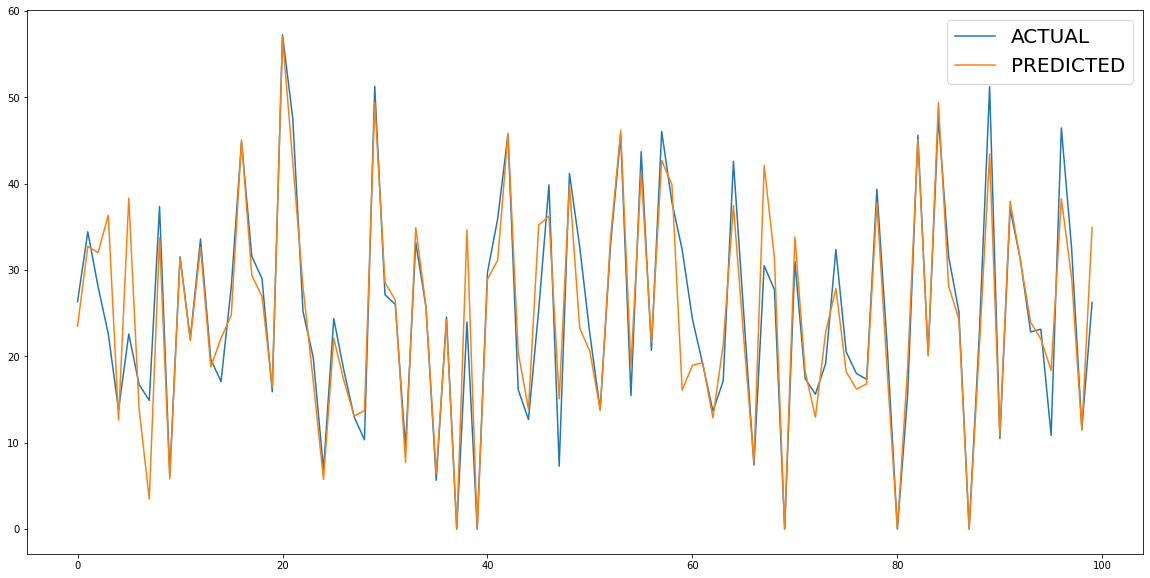

In [ ]:
#creating decision tree model
dt_model = DecisionTreeRegressor()
#calling run_model to train,fit and evalution of decision tree model
run_model(dt_model,X_train,y_train,X_test,y_test)

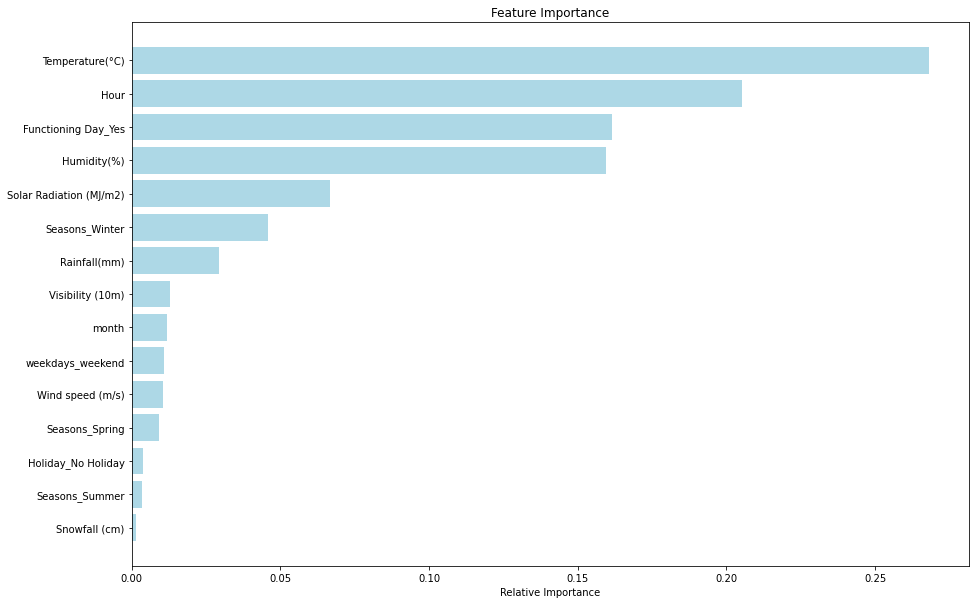

In [ ]:
#getting features importance of decision tree
get_features_importance(dt_model,X)

* According to Decision tree, temperature is the most important feature and has the highest impact on rented bike demand.

##7. Random Forest

In [ ]:
#importing Random forest
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#creating model of random forest
rf_model = RandomForestRegressor()

In [ ]:
#creating param dict to check random forest with different value of parameter through gridsearch
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

In [ ]:
#creating rf_grid model to run rf model with gridsearch
rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)


================Evaluation Matrix=========================

MSE : 18.43587916674576
RMSE : 4.293702268060253
R2 : 0.8796480932344224
Adjusted R2 :  0.8788176982935375

================Evaluation Matrix=========================

    =========================================================    Evaluation Graph    ===================================================



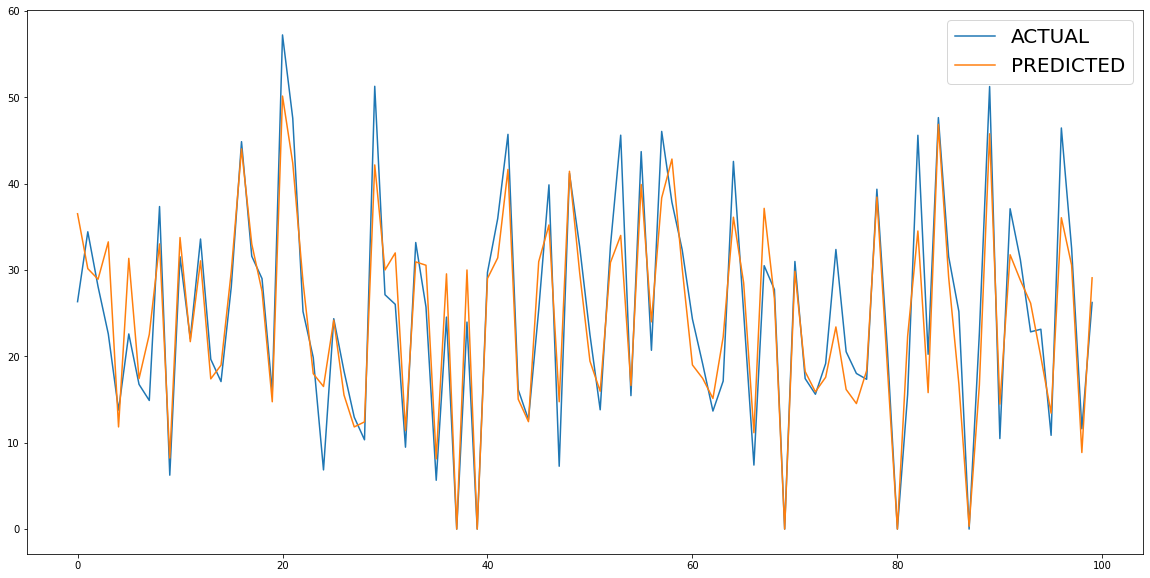

In [ ]:
#calling run_model to train,fit and evalution of decision tree model
run_model(rf_grid,X_train,y_train,X_test,y_test)

In [ ]:
#optimal rf model
optimal_rf_model=rf_grid.best_estimator_

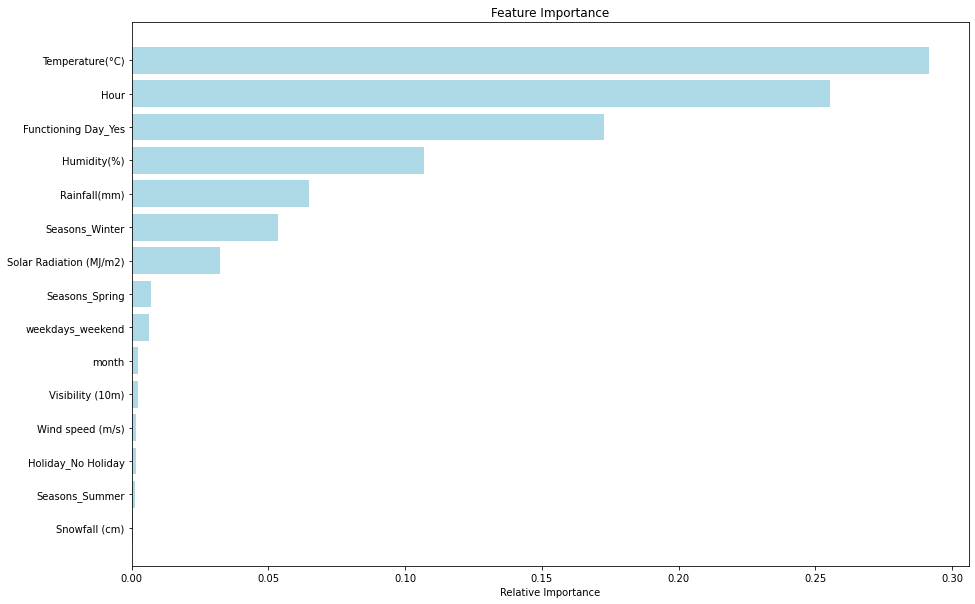

In [ ]:
#getting and visualizing features importance  of rf model
get_features_importance(optimal_rf_model,X)

* According to random forest, temperature is the most important feature and has the highest impact on rented bike demand.

##8. Gradient Boosting

In [ ]:
#importing Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
#creating model of Gradient Boosting
gb_model=GradientBoostingRegressor()

In [ ]:
# creating param dict to check diffirent value of parameter
n_estimators=[80,100,150]
max_depth=[15,20,30]

params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [ ]:
#grid search for gradient bossting
gb_grid= GridSearchCV(gb_model,param_grid=params,verbose=0)


================Evaluation Matrix=========================

MSE : 14.634011894478068
RMSE : 3.825442705684934
R2 : 0.904467195776188
Adjusted R2 :  0.903808045793043

================Evaluation Matrix=========================

    =========================================================    Evaluation Graph    ===================================================



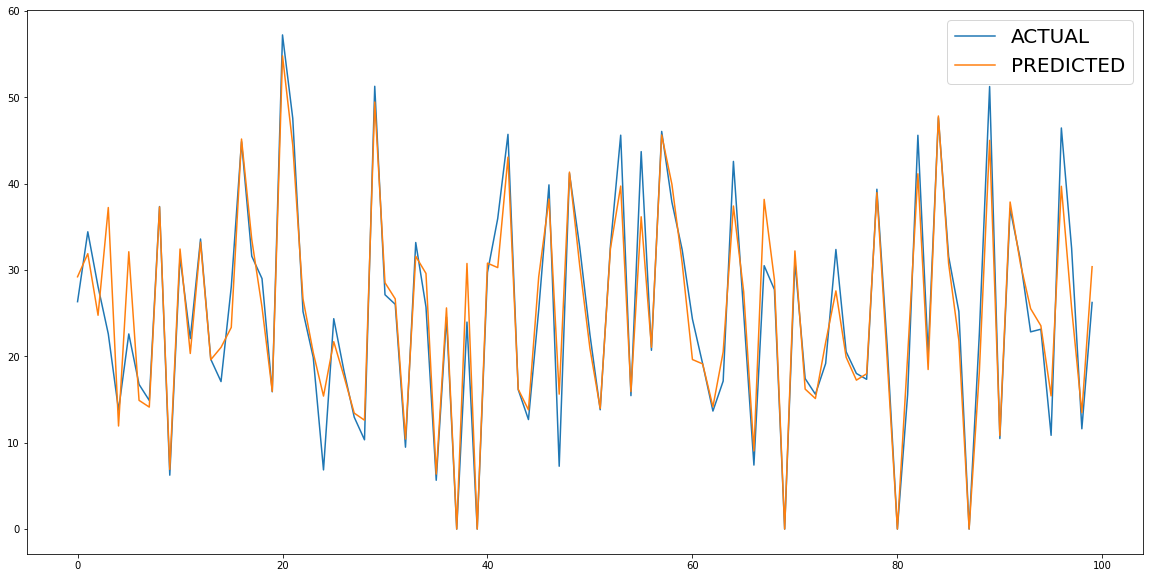

In [ ]:
#calling run_model to train,fit and evalution of gradient boosting model
run_model(gb_grid,X_train,y_train,X_test,y_test)

In [ ]:
#getting best estimator of GB model given by gb_grid model
optimal_gb_model=gb_grid.best_estimator_

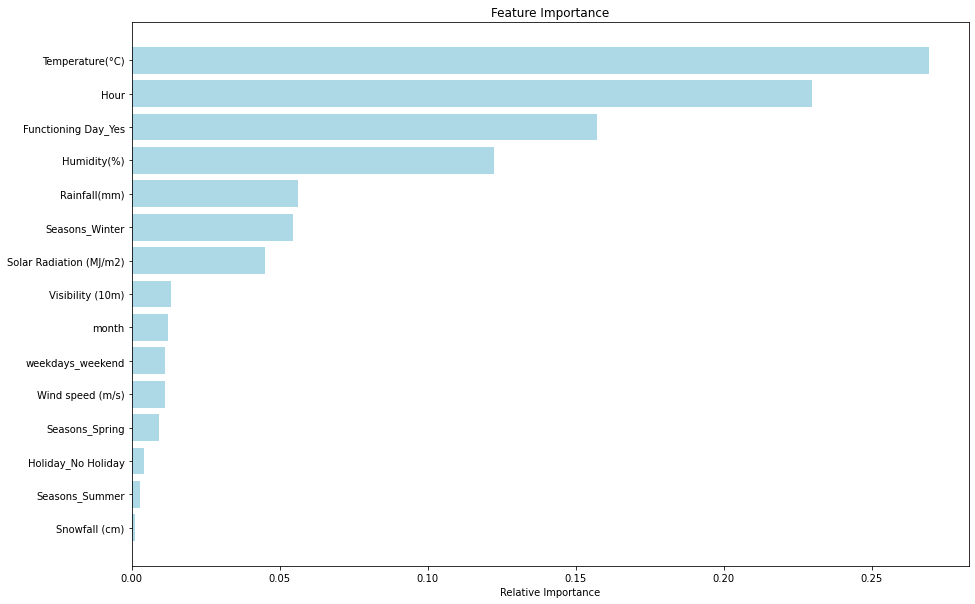

In [ ]:
#getting and visualizing features_importance of gradient boosting
get_features_importance(optimal_gb_model,X)

* According to Gradient Boosting, temperature is the most important feature and has the highest impact on rented bike demand. 

##9. eXtreme Gradient Boosting

In [ ]:
#importing XGBoost Regressor
from xgboost import XGBRegressor

In [ ]:
#creating Xgboost model
xgb_model=XGBRegressor()

In [ ]:
#creating param dict for gridsearch
n_estimators=[80,100,150]
max_depth=[15,20,30]


params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [ ]:
#creating xgb grid model
xgb_grid= GridSearchCV(xgb_model,param_grid=params,verbose=0)

[17:47:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

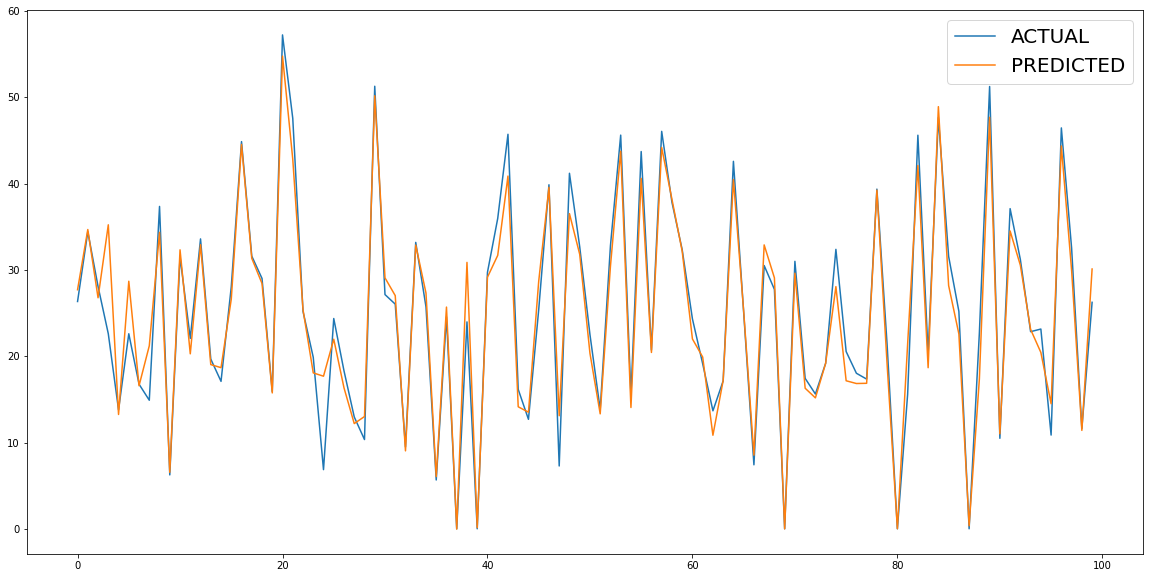

In [ ]:
#calling run_model to train,fit and evalution of xgb_grid model
run_model(xgb_grid,X_train,y_train,X_test,y_test);

In [ ]:
# getting best estimator of xgb model given by xgb grid model
optimal_xgb_model=xgb_grid.best_estimator_

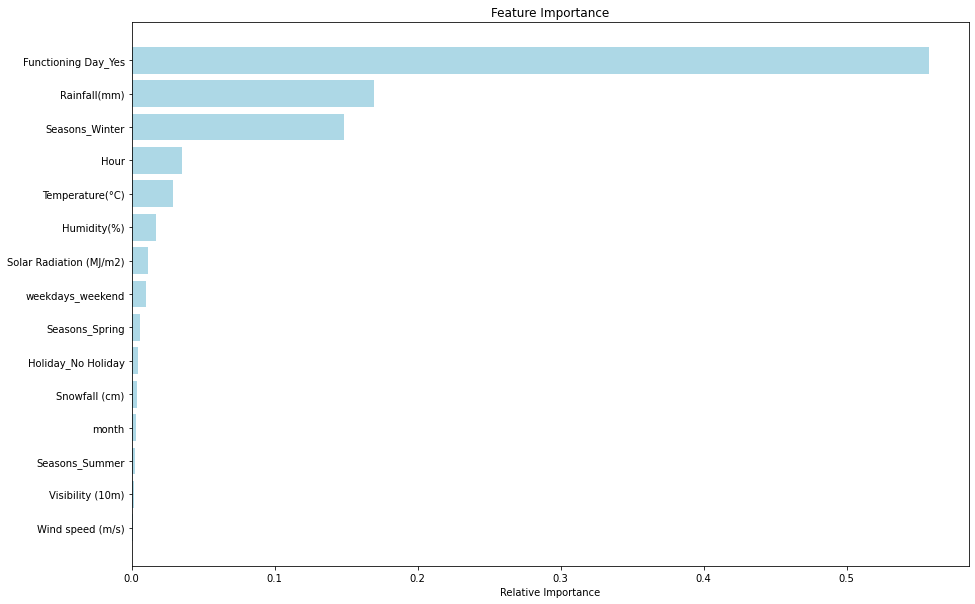

In [ ]:
#getting best param of rf model given by xgb_grid model
get_features_importance(optimal_xgb_model,X)

* As per eXtreme Gradient Boosting model, Functional day has the highest importance.

# Combined Evaluation Matrix of all the models



In [ ]:
#creating dictionary to store all the metrices 
all_model_matrices={'Mean_square_error':mean_sq_error,'Root_Mean_square_error':root_mean_sq_error,'R2':r2_list,'Adjusted_R2':adj_r2_list}

In [ ]:
#list of all model made ,'Gradient_Boosting',,'CATBoost'
model_name=['Linear','Lasso','Ridge','Elasticnet','Polynomial','Decision_Tree','Random_Forest','Gradient_Boosting','Xtreme_GB']

In [ ]:
#converting dictionary to dataframe fro easy visual
matrices_df=pd.DataFrame.from_dict(all_model_matrices,orient="index",columns=model_name)

In [ ]:
matrices_df

Linear          Lasso          Ridge  \
Mean_square_error       173680.505898  174034.671726  173959.546128   
Root_Mean_square_error     416.749932     417.174630     417.084579   
R2                           0.577557       0.576695       0.576878   
Adjusted_R2                  0.574642       0.573775       0.573959   

                           Elasticnet     Polynomial  Decision_Tree  \
Mean_square_error       174324.678423  115078.893750      24.121449   
Root_Mean_square_error     417.522069     339.232802       4.911359   
R2                           0.575990       0.720093       0.842532   
Adjusted_R2                  0.573064       0.718162       0.841445   

                        Random_Forest  Gradient_Boosting  Xtreme_GB  
Mean_square_error           18.435879          14.634012  11.875198  
Root_Mean_square_error       4.293702           3.825443   3.446041  
R2                           0.879648           0.904467   0.922477  
Adjusted_R2                  0.878818           0.903808   0.921942

In [ ]:
#transposing matrices_df for easy and clear view and saving that as new final matrices df
final_matrices=matrices_df.transpose().reset_index().rename(columns={'index':'Models'})

In [ ]:
final_matrices

Models  Mean_square_error  Root_Mean_square_error        R2  \
0             Linear      173680.505898              416.749932  0.577557   
1              Lasso      174034.671726              417.174630  0.576695   
2              Ridge      173959.546128              417.084579  0.576878   
3         Elasticnet      174324.678423              417.522069  0.575990   
4         Polynomial      115078.893750              339.232802  0.720093   
5      Decision_Tree          24.121449                4.911359  0.842532   
6      Random_Forest          18.435879                4.293702  0.879648   
7  Gradient_Boosting          14.634012                3.825443  0.904467   
8          Xtreme_GB          11.875198                3.446041  0.922477   

   Adjusted_R2  
0     0.574642  
1     0.573775  
2     0.573959  
3     0.573064  
4     0.718162  
5     0.841445  
6     0.878818  
7     0.903808  
8     0.921942

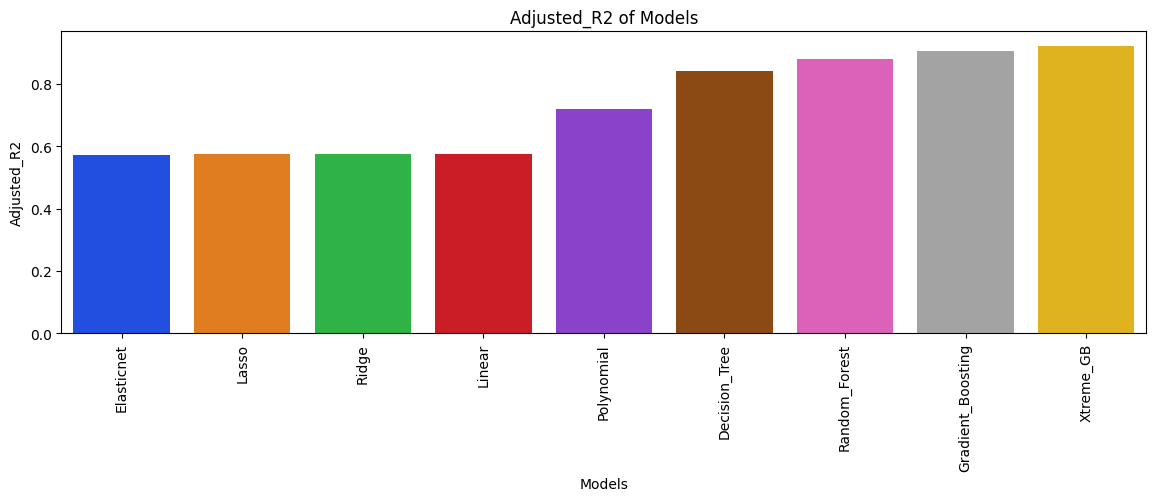

In [ ]:
#creating bar plot to visualize the Adjusted R2 of model 
plt.figure(figsize=(14,4),dpi=100)
sns.barplot(x='Models',y='Adjusted_R2',data=final_matrices.sort_values('Adjusted_R2'),palette="bright").set(title='Adjusted_R2 of Models')
plt.xticks(rotation=90);

##Conclusion - EDA

* The  highest demand for rental bikes was noted in June.
* The least demand of rented bikes is seen in the months of January and February.
* Summer is the busiest season in regards to rented bike demand Peak demand for rented bike is around 6pm (18:00). 
* Rented bike demand is less during winter season, in comparison to other seasons . 
* On working day, the rental bike demand is high in comparison to holiday
* highest demand for the rented bike is seen when there is moderate
temperature that is around 25°C to 35°C.

# Conclusion - Regression Model

* According to Decision tree and random forest tests, temperature is the most important feature and has the highest impact on rented bike demand.
* According to Gradient Boosting, temperature is the most important feature and has the highest impact on rented bike demand. 
* As per eXtreme Gradient Boosting model, Functional day has the highest importance.
* On the basis of R2 and Adjusted-R2, Gradient Boosting model and eXtreme Gradient Boosting model are best as the accuracy of these models are above 90% and also their Adjusted-R2 values are less than R2 values. 
* Gradient Boosting model's R2 and Adjusted-R2 values are 0.904 and 0.903 respectively. 
* eXtreme Gradient Boosting model's R2 and Adjusted-R2 values are 0.922 and 0.921 respectively. 
* Linear model, Lasso model, Ridge model, and Elasticnet model have Adjusted-R2 value below 60%.